In [18]:
from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Input,Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, AveragePooling2D, Cropping2D
from tensorflow.keras import optimizers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from tensorflow.keras.utils import *
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.utils
from numpy import argmax
import seaborn as sn 

from random import seed
from random import randint
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
#X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers.npy').astype(np.int16)
#Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers_labels.npy').astype(np.int16)

X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers.npy').astype(np.int16)
Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers_labels.npy').astype(np.int16)

(67305, 508, 508)
(67305, 1)
(67305, 224, 224)
[ 1  3  4  8  9 12 13 14 16 17 18 19 20]
61


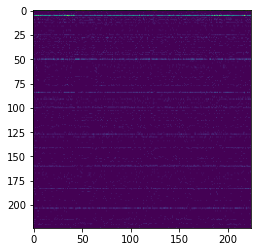

40


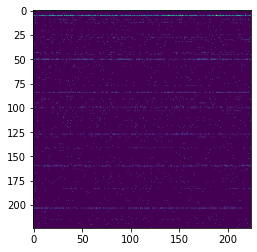

77


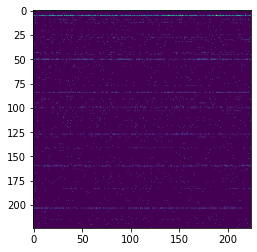

2109


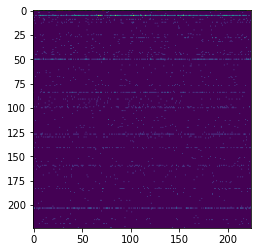

134


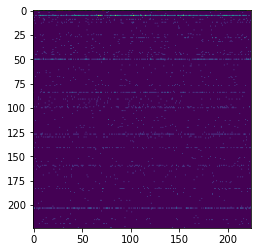

29


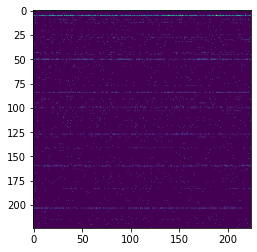

13


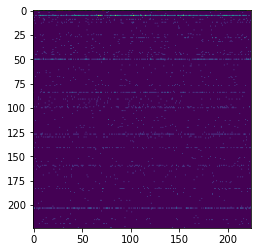

1291


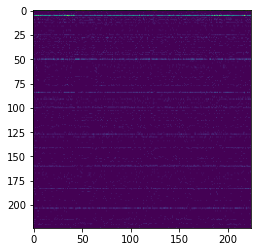

793


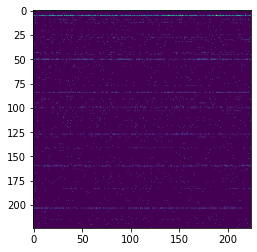

967


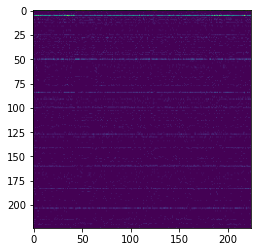

0


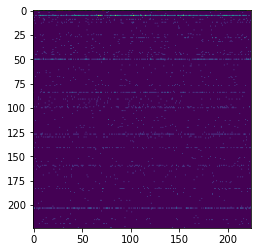

36


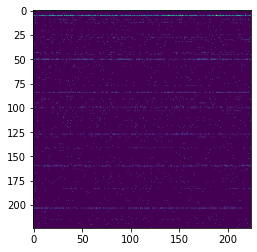

4


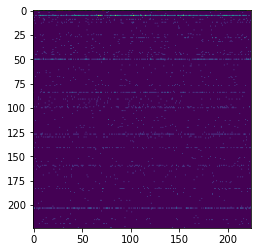

In [4]:
print(X.shape)
print(Y.shape)

X_resized = np.zeros((67305, 224, 224))

for i in range(X.shape[0]):
    X_resized[i] = cv2.resize(X[i], (224, 224), cv2.INTER_LINEAR)
    if X_resized[i].max()!=0:
        #print(X_resized[i].max())
        X_resized[i] = X_resized[i] / X_resized[i].max()

print(X_resized.shape)

X = X_resized
X_resized = None

type(X[0, 0, 0])

print(np.unique(Y))

indexes = np.where(Y == 1)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 3)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 4)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 8)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 9)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 12)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 13)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 14)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 16)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 17)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 18)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 19)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 20)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

In [5]:
print(X[0,:,:])

[[0.5        0.83333333 1.         ... 0.83333333 0.83333333 1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [6]:
"""scalers = {}
feature_vectors_scaler = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
for i in range(X.shape[1]):
    scalers[i] = preprocessing.StandardScaler()
    feature_vectors_scaler[:, i, :] = scalers[i].fit_transform(X[:, i, :]) """

#data split: 80% train, 10% dev and 10% test
validation_size = 0.2
seed = 7
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
print(Y_test.shape)

(53844, 224, 224)
(53844, 1)
(6730, 224, 224)
(6730, 1)
(6731, 224, 224)
(6731, 1)


In [7]:
feature_vectors_scaler = None
X = None
Y = None
path_log_base = './logs_CNN'

In [8]:
def metrics(Y_validation,predictions):
    
    classes = len(numpy.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()

In [9]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [10]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [11]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.pdf', format='pdf')     
        #plt.show()
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.pdf', format='pdf') 
        plt.show() 

In [12]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [13]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    # early stopping
    es = EarlyStopping(monitor='loss', patience=20, mode='min', verbose=1)
    
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint,es], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [28]:
def TE_VGG19():
      model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)

      # Block1_conv1 weights are of the format [3, 3, 3, 64] -> this is for RGB images
      # For grayscale, format should be [3, 3, 1, 64]. Weighted average of the features has to be calculated across channels.
      # RGB weights: Red 0.2989, Green 0.5870, Blue 0.1140

      # getting weights of block1 conv1.
      block1_conv1 = model.get_layer('block1_conv1').get_weights()
      weights, biases = block1_conv1

      # :weights shape = [3, 3, 3, 64] - (0, 1, 2, 3)
      # convert :weights shape to = [64, 3, 3, 3] - (3, 2, 0, 1)
      weights = np.transpose(weights, (3, 2, 0, 1))


      kernel_out_channels, kernel_in_channels, kernel_rows, kernel_columns = weights.shape

      # Dimensions : [kernel_out_channels, 1 (since grayscale), kernel_rows, kernel_columns]
      grayscale_weights = np.zeros((kernel_out_channels, 1, kernel_rows, kernel_columns))

      # iterate out_channels number of times
      for i in range(kernel_out_channels):

        # get kernel for every out_channel
        get_kernel = weights[i, :, :, :]

        temp_kernel = np.zeros((3, 3))

        # :get_kernel shape = [3, 3, 3]
        # axis, dims = (0, in_channel), (1, row), (2, col)

        # calculate weighted average across channel axis
        in_channels, in_rows, in_columns = get_kernel.shape

        for in_row in range(in_rows):
          for in_col in range(in_columns):
            feature_red = get_kernel[0, in_row, in_col]
            feature_green = get_kernel[1, in_row, in_col]
            feature_blue = get_kernel[2, in_row, in_col]

            # weighted average for RGB filter
            total = (feature_red * 0.2989) + (feature_green * 0.5870) + (feature_blue * 0.1140)

            temp_kernel[in_row, in_col] = total


        # :temp_kernel is a 3x3 matrix [rows x columns]
        # add an axis at the end to specify in_channel as 1

        # Second: Add axis at the start of :temp_kernel to make its shape: [1, 3, 3] which is [in_channel, rows, columns]
        temp_kernel = np.expand_dims(temp_kernel, axis=0)

        # Now, :temp_kernel shape is [1, 3, 3]

        # Concat :temp_kernel to :grayscale_weights along axis=0
        grayscale_weights[i, :, :, :] = temp_kernel

      # Dimension of :grayscale_weights is [64, 1, 3, 3]
      # In order to bring it to tensorflow or keras weight format, transpose :grayscale_weights

      # dimension, axis of :grayscale_weights = (out_channels: 0), (in_channels: 1), (rows: 2), (columns: 3)
      # tf format of weights = (rows: 0), (columns: 1), (in_channels: 2), (out_channels: 3)

      # Go from (0, 1, 2, 3) to (2, 3, 1, 0)
      grayscale_weights = np.transpose(grayscale_weights, (2, 3, 1, 0)) # (3, 3, 1, 64)

      # combine :grayscale_weights and :biases
      new_block1_conv1 = [grayscale_weights, biases]


      # Reconstruct the layers of VGG16 but replace block1_conv1 weights with :grayscale_weights

      # get weights of all the layers starting from 'block1_conv2'
      vgg19_weights = {}
      for layer in model.layers[2:]:
        if "conv" in layer.name:
          vgg19_weights["224_" + layer.name] = model.get_layer(layer.name).get_weights()

      del model


      # Custom build VGG19
      input = Input(shape=(224, 224, 1), name='224_input')
      # Block 1
      x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1), data_format="channels_last", name='224_block1_conv1')(input)
      x = Conv2D(64, (3, 3), activation='relu', padding='same', name='224_block1_conv2')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block1_pool')(x)

      # Block 2
      x = Conv2D(128, (3, 3), activation='relu', padding='same', name='224_block2_conv1')(x)
      x = Conv2D(128, (3, 3), activation='relu', padding='same', name='224_block2_conv2')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block2_pool')(x)

      # Block 3
      x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv1')(x)
      x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv2')(x)
      x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv3')(x)
      x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv4')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block3_pool')(x)

      # Block 4
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv1')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv2')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv3')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv4')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block4_pool')(x)

      # Block 5
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv1')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv2')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv3')(x)
      x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv4')(x)
      x = MaxPooling2D((8, 8), strides=(8, 8), name='224_block5_pool')(x)

      base_model = Model(inputs=input, outputs=x)

      base_model.get_layer('224_block1_conv1').set_weights(new_block1_conv1)
      for layer in base_model.layers[2:]:
        if 'conv' in layer.name:
          base_model.get_layer(layer.name).set_weights(vgg19_weights[layer.name])

      x = base_model.output

      for layer in base_model.layers:
          layer.trainable = False

      x = tf.keras.layers.GlobalAveragePooling2D()(x)  
      layers = tf.keras.layers.Flatten()(x)
      #layers = tf.keras.layers.Dense(128,activation="relu")(layers)
      layers = tf.keras.layers.Dropout(0.2)(layers)
      layers = tf.keras.layers.Dense(1024 ,activation="relu")(layers)
      layers = tf.keras.layers.Dropout(0.2)(layers)
      layers = tf.keras.layers.Dense( 512,activation="relu")(layers)
      layers = tf.keras.layers.Dense( 64,activation="relu")(layers)
      predictions = tf.keras.layers.Dense(21, activation="softmax", name="output_1")(layers)

      #Compilador
      model = tf.keras.Model(inputs = base_model.input, outputs=predictions)
      optimizer=tf.keras.optimizers.Adam(lr=0.0001) 
      model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=[f1_m])
      model.summary()
      return model

In [29]:
model = TE_VGG19()
# summarize layers
print(model.summary())
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
224_input (InputLayer)       [(None, 224, 224, 1)]     0         
_________________________________________________________________
224_block1_conv1 (Conv2D)    (None, 224, 224, 64)      640       
_________________________________________________________________
224_block1_conv2 (Conv2D)    (None, 224, 224, 64)      36928     
_________________________________________________________________
224_block1_pool (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
224_block2_conv1 (Conv2D)    (None, 112, 112, 128)     73856     
_________________________________________________________________
224_block2_conv2 (Conv2D)    (None, 112, 112, 128)     147584    
_________________________________________________________________
224_block2_pool (MaxPooling2 (None, 56, 56, 128)       0   

In [30]:
one_hot_labels_train = tf.keras.utils.to_categorical(Y_train, num_classes=21)
one_hot_labels_validation = tf.keras.utils.to_categorical(Y_dev, num_classes=21)
one_hot_labels_test = tf.keras.utils.to_categorical(Y_test, num_classes=21)

# Fit the model
epochs = 200
train(model, X_train, one_hot_labels_train, X_dev, one_hot_labels_validation, X_test, one_hot_labels_test, 64, epochs, "TERL")
Final_Results_Test(log_Dir) 

Epoch 1/200
842/842 [==============================] - 183s 217ms/step - loss: 1.9727 - f1_m: 0.1644 - val_loss: 1.7007 - val_f1_m: 0.2492
Epoch 2/200
842/842 [==============================] - 183s 217ms/step - loss: 1.7119 - f1_m: 0.3234 - val_loss: 1.5491 - val_f1_m: 0.4218
Epoch 3/200
842/842 [==============================] - 183s 217ms/step - loss: 1.6288 - f1_m: 0.3642 - val_loss: 1.4740 - val_f1_m: 0.4409
Epoch 4/200
842/842 [==============================] - 182s 216ms/step - loss: 1.5717 - f1_m: 0.3889 - val_loss: 1.4149 - val_f1_m: 0.4498
Epoch 5/200
842/842 [==============================] - 183s 217ms/step - loss: 1.5368 - f1_m: 0.4025 - val_loss: 1.4076 - val_f1_m: 0.4775
Epoch 6/200
842/842 [==============================] - 183s 217ms/step - loss: 1.5096 - f1_m: 0.4149 - val_loss: 1.3523 - val_f1_m: 0.4941
Epoch 7/200
842/842 [==============================] - 183s 217ms/step - loss: 1.4914 - f1_m: 0.4230 - val_loss: 1.3755 - val_f1_m: 0.4619
Epoch 8/200
842/842 [======

KeyboardInterrupt: 

In [ ]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)


Baseline Error train: 0.40%
Baseline Error dev: 5.44%
Baseline Error test: 4.07%
Accuracy: 0.9960812718223014
F1 score: 0.9960692129768787
Recall: 0.9960812718223014
Precision: 0.9960961245009619

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9563
           3       1.00      0.99      0.99      1158
           4       1.00      0.99      0.99      1481
           8       0.98      0.80      0.88        71
           9       0.98      1.00      0.99      2896
          12       0.99      0.99      0.99      5006
          13       1.00      1.00      1.00      2465
          14       1.00      1.00      1.00      1717
          16       1.00      1.00      1.00       434
          17       1.00      1.00      1.00      3605
          18       0.99      1.00      1.00      8282
          19       1.00      1.00      1.00      2765
          20       1.00      1.00      1.00     14401

    accuracy         

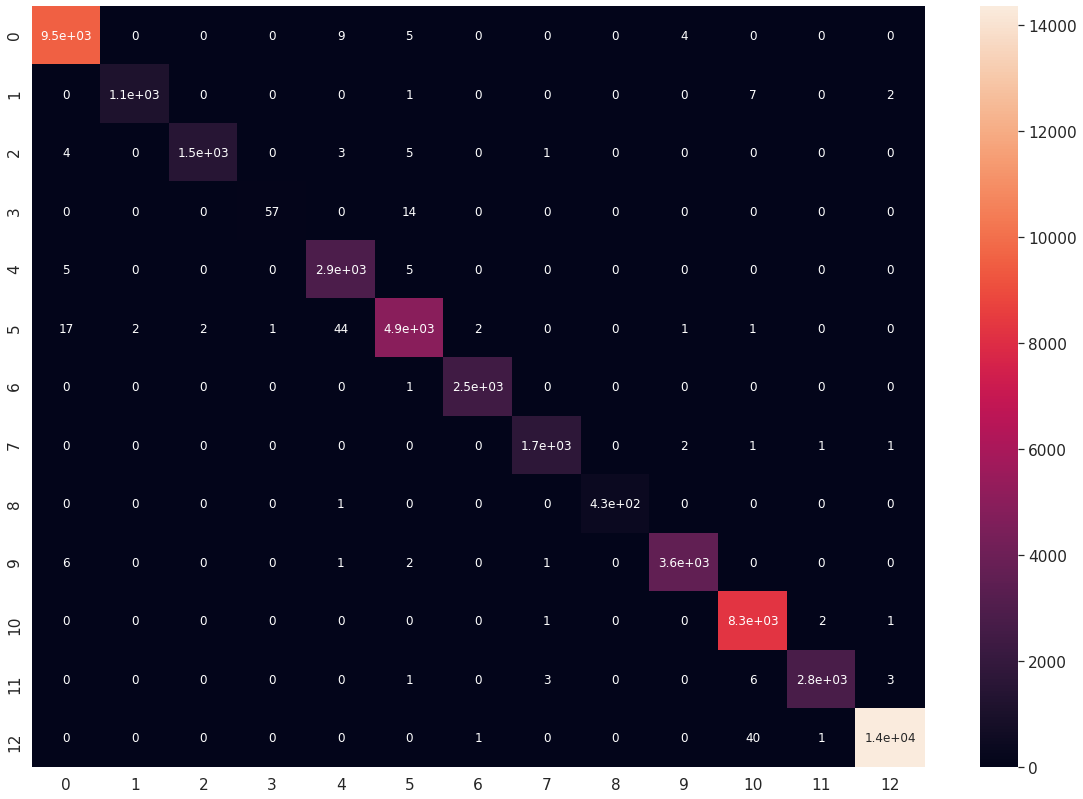

Accuracy: 0.9447251114413076
F1 score: 0.9442422649338833
Recall: 0.9447251114413076
Precision: 0.9449148193840181

 clasification report:
               precision    recall  f1-score   support

           1       0.97      0.96      0.97      1248
           3       0.92      0.80      0.86       155
           4       0.95      0.88      0.92       180
           8       0.25      0.17      0.20         6
           9       0.88      0.96      0.91       341
          12       0.89      0.88      0.89       599
          13       0.95      0.96      0.95       340
          14       0.87      0.83      0.85       218
          16       0.93      0.67      0.78        57
          17       0.94      0.97      0.95       430
          18       0.92      0.98      0.95      1055
          19       0.95      0.91      0.93       362
          20       0.99      0.98      0.98      1739

    accuracy                           0.94      6730
   macro avg       0.88      0.84      0.86     

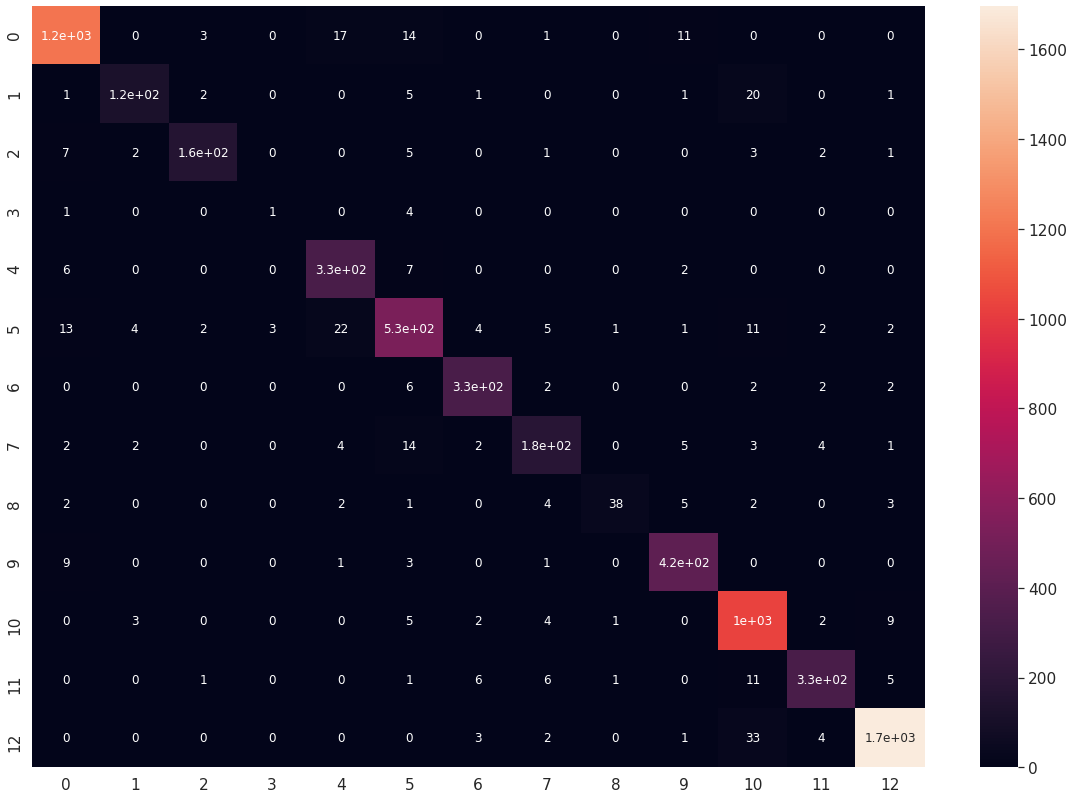

Accuracy: 0.9576585945624722
F1 score: 0.9572211454680897
Recall: 0.9576585945624722
Precision: 0.9574187952664653

 clasification report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98      1220
           3       0.89      0.81      0.85       145
           4       0.97      0.92      0.94       166
           8       0.50      0.29      0.36         7
           9       0.89      0.97      0.93       319
          12       0.90      0.88      0.89       575
          13       0.97      0.97      0.97       325
          14       0.91      0.86      0.88       201
          16       0.93      0.74      0.83        58
          17       0.97      0.97      0.97       497
          18       0.96      0.98      0.97      1059
          19       0.96      0.94      0.95       372
          20       0.99      0.99      0.99      1787

    accuracy                           0.96      6731
   macro avg       0.91      0.87      0.88     

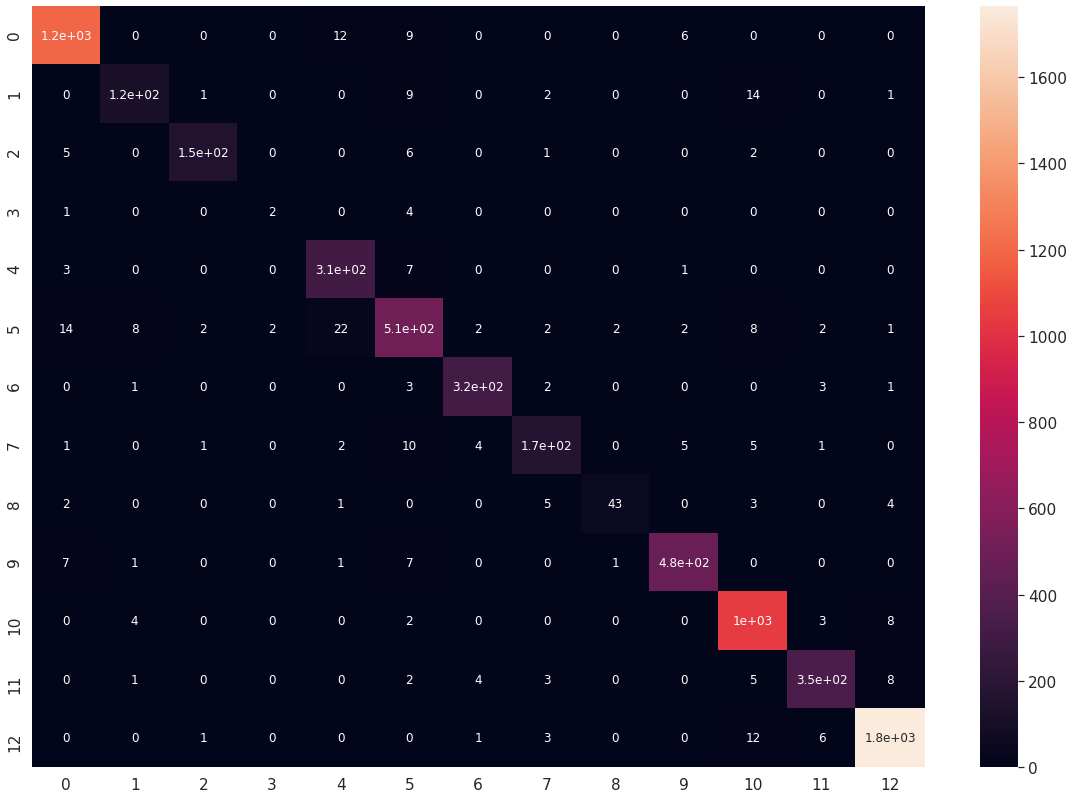

In [18]:
model = tf.keras.models.load_model(log_Dir+'/saved-model-169-0.9455.hdf5', custom_objects={'f1_m':f1_m})
scores = model.evaluate(X_train, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_dev, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_train)

metrics(Y_train, [argmax(x) for x in predictions])

predictions = model.predict(X_dev)

metrics(Y_dev, [argmax(x) for x in predictions])

predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])